Original shape: (4752, 196608)
PCA-transformed shape: (4752, 50)


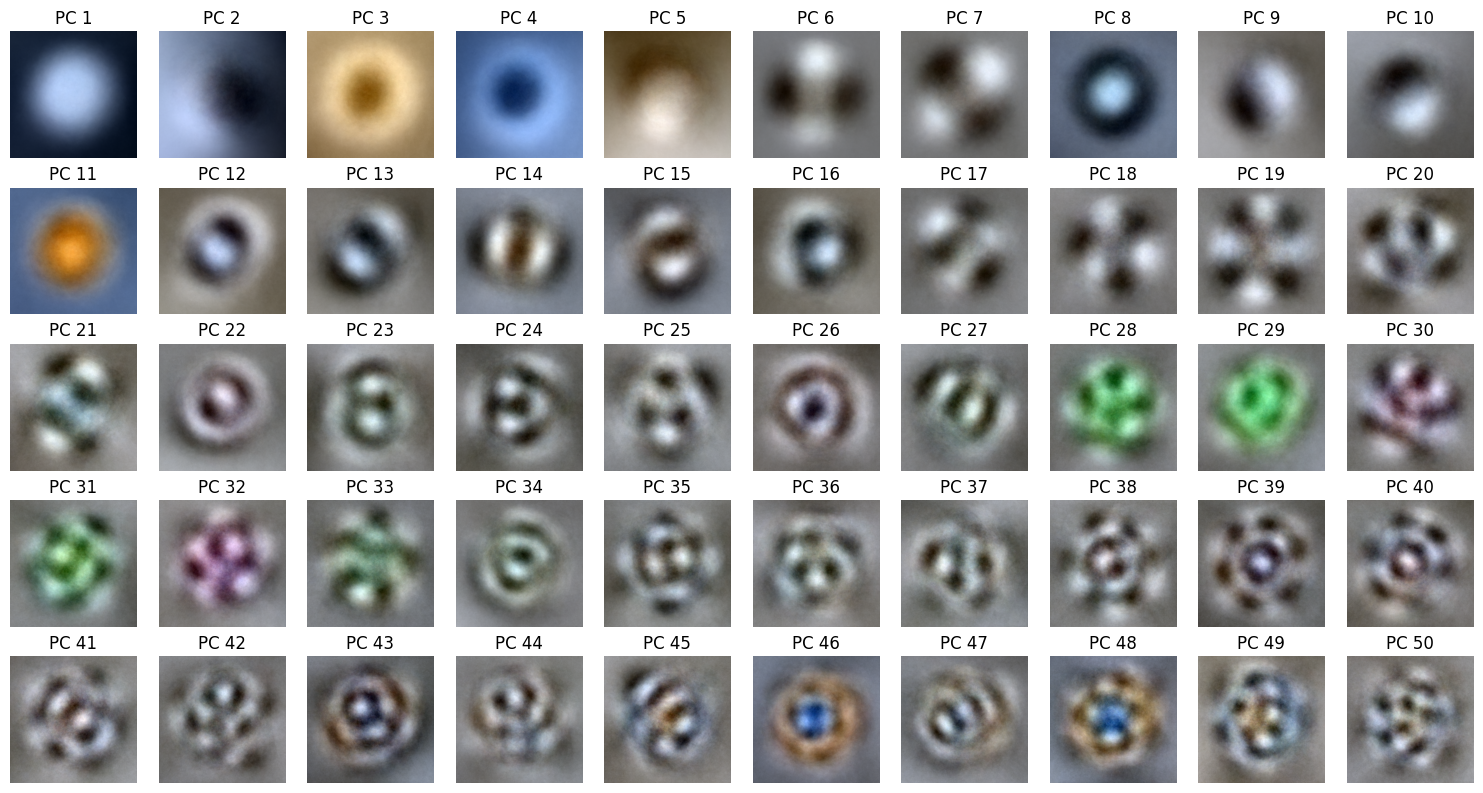

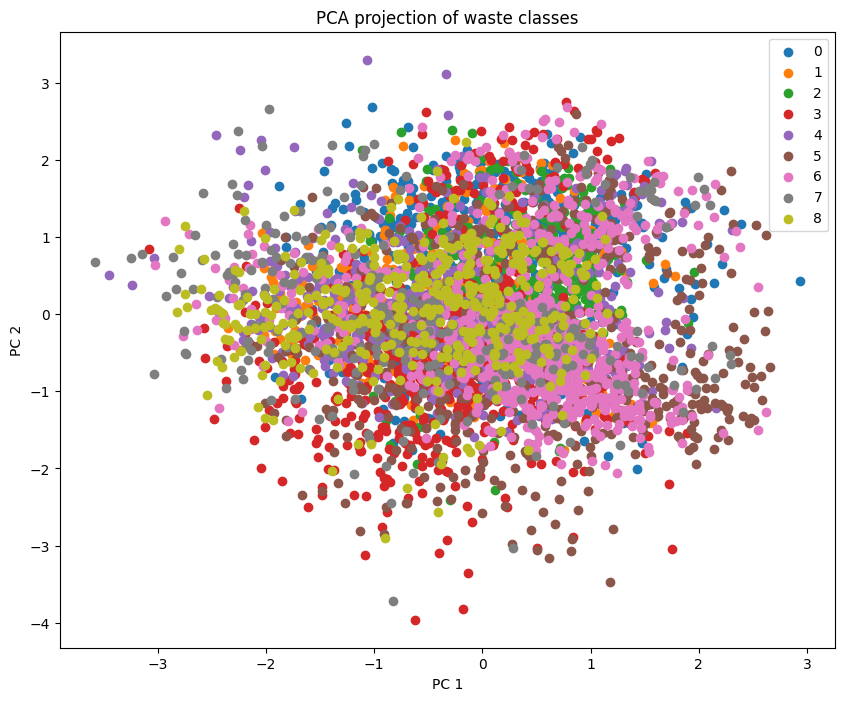

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 1. Load preprocessed data
images = np.load("images.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)

# Flatten images for PCA
n_samples, h, w, c = images.shape
X = images.reshape(n_samples, h * w * c)

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# 2. Apply PCA
X = X.astype(np.float32)
n_components = 50  # number of principal components
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("PCA-transformed shape:", X_pca.shape)

# 3. Visualize top principal components (optional for RGB)
# Convert back to (h, w, c) for visualization
eigenitems = pca.components_.reshape((n_components, h, w, c))

fig, axes = plt.subplots(5, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    if i >= n_components:
        break
    ax.imshow((eigenitems[i] - eigenitems[i].min()) / (eigenitems[i].max() - eigenitems[i].min()))
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 4. Optional: Visualize first 2 PCA components with labels
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                label=encoder.inverse_transform([label])[0])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA projection of waste classes")
plt.legend()
plt.show()
